In [1]:
import datacube
%matplotlib inline
from datetime import datetime
import matplotlib
from datacube.storage import masking
from madmex.util.xarray import to_float
from madmex.wrappers import gwf_query
from madmex.util import mid_date
from madmex.recipes import RECIPES
import os
from madmex.settings import INGESTION_PATH
import xarray as xr
from datacube.api import GridWorkflow

import os
import gc
import datacube
from datacube.drivers.netcdf import write_dataset_to_netcdf
from datacube.api import GridWorkflow
import xarray as xr
import numpy as np


from madmex.util.xarray import to_float, to_int

from datetime import datetime

from madmex.util import randomword

In [2]:
dc = datacube.Datacube()

## Calcula ndbi con swir1, ndbi con swir2 y ndmi para zona de Veracruz

In [3]:
options = {}
name_of_product = 'recipe_mex_L5_9596'
#name_of_product = 'l7_oax_50km_no_gaps_recipe_0405'
#x = (-96.93511962890624, -96.536865234375)
#y = (16.909683615558635, 17.19852235364461)
x = (-97.4652, -97.01477)
y = (19.8597, 20.62764)
options['lat'] = y
options['long'] = x
options['region'] = None
options['begin'] = "1995-01-1"
options['end'] = "1996-12-1"

In [4]:
gwf_kwargs = { k: options[k] for k in ['lat', 'long', 'region', 'begin', 'end']}
gwf_kwargs.update(product=name_of_product)
tile = gwf_query(**gwf_kwargs)

In [5]:
list(tile)

[((39, -31), Tile<sources=<xarray.DataArray (time: 1)>
  array([(Dataset <id=e752f83f-35c4-5415-a7fd-981371ee4cb6 type=recipe_mex_L5_9596 location=file://shared_volume/datacube/datacube_ingest/recipes/recipe_mex_L5_9596/madmex_003_39_-31_1996-01-01.nc>,)],
        dtype=object)
  Coordinates:
    * time     (time) datetime64[ns] 1996-01-01,
  	geobox=GeoBox(1667, 1667, Affine(30.0, 0.0, 2927550.0,
         0.0, -30.0, 926420.0), PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,6556752.3141]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0]])>),
 ((39, -30), Tile<sources=<xarray.DataArray (time: 1)>
  array([(Dataset <id=4e3feff7-7ec7-595f-af33-7a34d7b29624 type=recipe_mex_L5_9596 location=file://shared_vo

In [7]:
ds = dc.load(name_of_product, time=(datetime(1995, 1, 1), datetime(1996, 12, 1)),x=x,y=y)

In [8]:
ds

<xarray.Dataset>
Dimensions:     (time: 1, x: 1657, y: 2890)
Coordinates:
  * time        (time) datetime64[ns] 1996-01-01
  * y           (y) float64 9.726e+05 9.725e+05 ... 8.859e+05 8.859e+05
  * x           (x) float64 2.97e+06 2.97e+06 2.97e+06 ... 3.02e+06 3.02e+06
Data variables:
    blue_mean   (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    green_mean  (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    red_mean    (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    nir_mean    (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    swir1_mean  (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    swir2_mean  (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    ndvi_mean   (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    ndmi_mean   (time, y, x) int16 -9999 -9999 -9999 -9999 ... -9999 -9999 -9999
    ndvi_max    (time, y, x) int16 -9999 -9999 -9999 -9999 ... -

In [9]:
ds_mean = ds.mean('time', keep_attrs=True, skipna=True)

In [10]:
ds_mean

<xarray.Dataset>
Dimensions:     (x: 1657, y: 2890)
Coordinates:
  * y           (y) float64 9.726e+05 9.725e+05 ... 8.859e+05 8.859e+05
  * x           (x) float64 2.97e+06 2.97e+06 2.97e+06 ... 3.02e+06 3.02e+06
Data variables:
    blue_mean   (y, x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
    green_mean  (y, x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
    red_mean    (y, x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
    nir_mean    (y, x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
    swir1_mean  (y, x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
    swir2_mean  (y, x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
    ndvi_mean   (y, x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
    ndmi_mean   (y, x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
    ndvi_max    (y, x) float64 -9.999e+03 -9.999e+03 ... -9.999e+03 -9.999e+03
    ndvi_min    (y, x) float64 -9.999e+03 -9.999e+03 ... -9

In [11]:
matplotlib.rcParams['figure.figsize'] = [12, 8]

### elevation con swir2 de zona de Veracruz

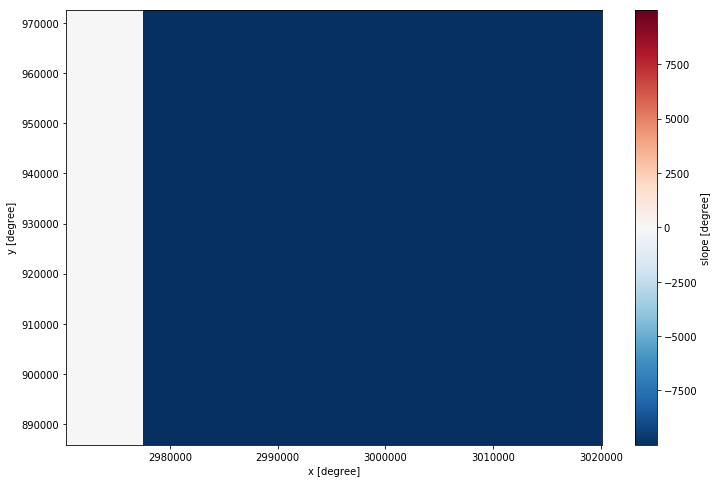

In [22]:
ds_mean.slope.plot()

In [24]:
from pyproj import Proj, transform
from rasterio.crs import CRS

inProj = Proj(CRS.from_wkt(str(ds.crs)).to_proj4())
outProj = Proj(init='epsg:4326')
x1,y1 = 2980000,890000
#x1,y1 = -95,17
x2,y2 = transform(inProj,outProj,x1,y1)

In [25]:
x2,y2

(-97.3976371200235, 19.89467824394648)